# **Metode Bagi Dua (Bisection Method)**













**Algoritma**

Misalkan diberikan fungsi f

1.   Hitung $c= \frac{(a+b)}{2}$
2.   Jika $b-c<\epsilon$, maka dipilih $a=c$, kemudian berhenti
3.   Jika tanda $f(b)$. tanda $f(c)<0$, maka dipilih a=c, b tetap, kemudian kembali langkah 1. Jika tanda $f(b)$. tanda $f(c)>0$, maka dipilih b=c, a tetap, kemudian kembali ke langkah 1.




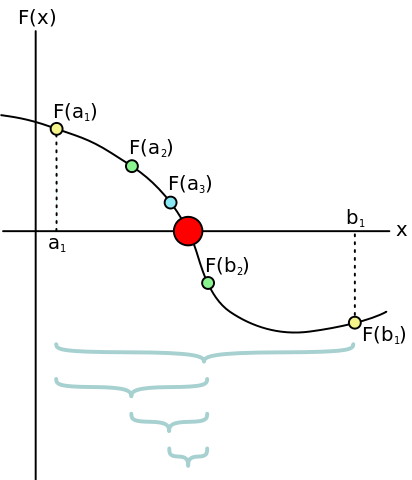

**Contoh Soal**

Tentukan salah satu akar dari $x-sin(10x)=0$

In [10]:
import numpy as np
from pandas import DataFrame

def F(x):
    y=x-np.sin(10*x)
    return(y)
    
def bisection(low,high,f,error):
    A=np.array([[low,(low+high)/2,high]])
    N=0
    NMAX=np.ceil((np.log(abs(high-low))-np.log(error))/np.log(2))
    print("Maksimum iterasi = ",NMAX)
    print("\nSilahkan tunggu ... \n")
    
    if f(low)*f(high)>0:
        print("Metode biseksi gagal, coba interval lain ya.")
    while N<NMAX+1:
        mid=(low+high)/2
        if f(low)*f(high)*f(mid)==0:
            print("Cek lagi siapa yang akar, low, mid, atau high")
            break
        if f(low)*f(mid)<0:
            low=low
            high=mid
            mid=(low+high)/2
        if f(mid)*f(high)<0:
            high=high
            low=mid
            mid=(low+high)/2
        N+=1
        A=np.append(A,[[low,mid,high]],axis=0)
        if high-low<error:
            print("Banyaknya iterasi yang dibutuhkan = ",N)
            print("Akar = ", mid)
            print("error hingga = ",error)
            break
    else:
        print("Metode biseksi gagal.")
    return(mid,A)

akar, tabel=bisection(-np.pi/2+0.1,np.pi/2,F,1e-4)

tabel=DataFrame(tabel,columns=["Low","Mid","High"])
print("  ")
print(tabel)

Maksimum iterasi =  15.0

Silahkan tunggu ... 

Banyaknya iterasi yang dibutuhkan =  11
Akar =  0.8422825346287743
error hingga =  0.0001
  
         Low       Mid      High
0  -1.470796  0.050000  1.570796
1   0.050000  0.810398  1.570796
2   0.810398  1.190597  1.570796
3   0.810398  1.000498  1.190597
4   0.810398  0.905448  1.000498
5   0.810398  0.857923  0.905448
6   0.834161  0.846042  0.857923
7   0.840101  0.843072  0.846042
8   0.841586  0.842329  0.843072
9   0.841958  0.842143  0.842329
10  0.842143  0.842236  0.842329
11  0.842236  0.842283  0.842329


**Contoh Soal**
Tentukan akar persamaan dari $x^5 + x^4 - 3=0$

In [ ]:
import numpy as np
import math
from pandas import DataFrame

def f(x):
    y = x**5+x**4-3
    return y

def bisection (low, high, f, error):
    A = np.array ([[low,(low+high)/2, high]])
    N = 0
    NMAX = np.ceil((np.log(abs(high-low))-np.log(error))/np.log(2))
    print("Maksimum iterasi = ", NMAX)
    print("Mohon tunggu . . .")
    if f(low)*f(high) > 0:
        print ("Bisection fails")
    while N < NMAX+1:
        mid = (low+high)/2
        if f(low)*f(high)*f(mid) == 0:
            print("cek akar untuk low, mid, atau high")
            break
        if f(low)*f(mid) < 0:
            low = low
            high = mid
            mid = (low+high)/2
        if f(mid)*f(high) < 0 :
            high = high
            low = mid
            mid = (low+high)/2
        N+=1
        A = np.append(A, [[low,mid,high]], axis = 0)
        if high-low < error:
            print("banyak iterasi yang dibutuhkan = ", N)
            print("akar = ", round(mid, 4))
            print("error hingga = ", error)
            break
    else:
        print("Metode biseksi gagal.")
    return(mid, A)
    
akar, tabel = bisection(1,2,f,1e-100)

tabel = DataFrame(tabel, columns=['low', 'mid', 'high'])
print(' ')
print(tabel)



---


**Latihan**

Tentukan salah satu akar dari persamaan $𝑥^3+2𝑥−2=0$ serta rekam semua tebakan (LOW,MID,HIGH) dalam satu tabel. Gunakan metode biseksi dengan eror $10^{-7}$. Perlihatkan pula bahwa nilai iterasi yang didapat tidak melebihi estimasi banyak iterasi.



---





# **Metode Newton (Newton Method)**

**Algoritma**

1.   Pilihlah penduga awal $x_0$
2.   Tentukan $f'(x_0)$
3.   Jika $f'(x_0)=0$, maka iterasi dihentikan (metode Newton tidak dapat dilanjutkan) jika $f'(x_0) \ne 0$, hitung $x_1=x_0 - \frac{f(x_0)}{f'(x_0)}$
4.   Jika $|x_1-x_0| \le \epsilon$, maka dipilih $a=x_1$, kemudian berhenti. Jika $|x_1-x_0| \ge \epsilon$, maka diambil $x_0=x_1$ dan kemudian kembali ke langkah 2.



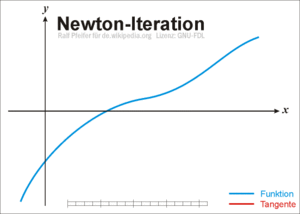

**Metode Newton juga bisa gagal**

Ketika turunan fungsi untuk suatu $x_n$ sama dengan nol atau $f'(x_n)=0$

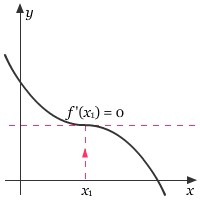

**Contoh Soal**
Tentukan akar dari persamaan $x-3sin(x+1)=0$

In [2]:
import math

def F(x):
    y = x - 3*math.sin(x+1)
    return(y)
def f(x):
    y1 = 1-3*math.cos(x+1)
    return(y1)
def newton(x0, TOL, MAX):
    N = 1
    x = x0
    while N <= MAX:
        x = x - F(x)/f(x)
        N += 1
        print(x)
        if abs(F(x)) < TOL:
            return x
        
MAX = float(input("Masukkan iterasi maksimal: "))
newton(-3,1e-6,MAX)


Masukkan iterasi maksimal: 2
-2.8789793555328043
-2.8683402497618102




---


**Latihan**

Tentukan akar positif terkecil dari persamaan $x^3-3,23x^2-5,54x+9.84=0$ dengan iterasi sebanyak 10



# **Metode Tali Busur (Secant Method)**



---


**Algoritma**



1.   Pilihlah penduga awal $x_0$ dan $x_1$
2.   Tentukan $f(x_1)$ dan $f(x_0)$
3.   Jika $f(x_1)=f(x_0)$, maka iterasi dihentikan (Metode Secant tidak dapat dilanjutkan). Jika $f(x_1) \ne  f(x_0)$, hitung $x_2=x_1 - \frac{x_1-x_0}{f(x_1)-f(x_0)}f(x_1)$
4.   Jika $|x_2-x_1| \le \epsilon$, maka dipilih $a=x_2$, kemudian berhenti. Jika $|x_2-x_1| > \epsilon$, maka diambil $x_0=x_1$ dan $x_1=x_2$ kemudian kembali ke langkah 2.



---



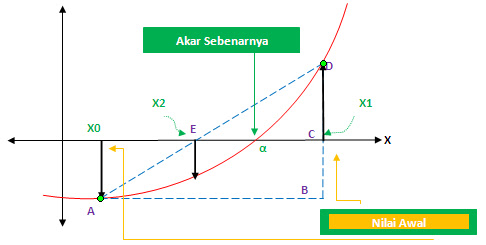

**Contoh Soal**

Tentukan akar dari $y=x^3 - x^2+2=0$

In [6]:
def f(x):
    y=x**3-x**2+2
    return(y)
def secant(f,x0,x1,TOL,MAX):
    N=1
    xOld=x0
    xNew=x1
    while N<=MAX:
        N+=1
        x=xNew-(f(xNew)*(xNew-xOld)/(f(xNew)-f(xOld)))
        xOld=xNew
        xNew=x
        if abs(xNew-xOld)<TOL:
            print('banyak iterasi : ',N)
            print(x)
            break
    else:
        print("Metode Secant Gagal")
    return (x)

MAX=float(input("Masukkan iterasi maksimal : "))
secant(f,-4.0,0.0,1e-7,MAX)

Masukkan iterasi maksimal : 100
banyak iterasi :  22
-0.9999999999999971


-0.9999999999999971

**Latihan**

Tentukan akar positif terkecil dari persamaan $x^3-3,23x^2-5,54x+9.84=0$ dengan iterasi sebanyak 10 dengan eror $10^{-4}$